In [115]:
import pandas as pd
import seaborn as sns

In [116]:
import matplotlib.pyplot as plt

In [117]:
df = pd.read_csv('https://raw.githubusercontent.com/RahinUlde/DataSets/refs/heads/main/adult_with_headers.csv')

In [118]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [119]:
df.rename(columns={"fnlwgt": "sample_weight",}, inplace=True)

In [120]:
df.isna().sum()

age               0
workclass         0
sample_weight     0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   sample_weight   32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [122]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 200

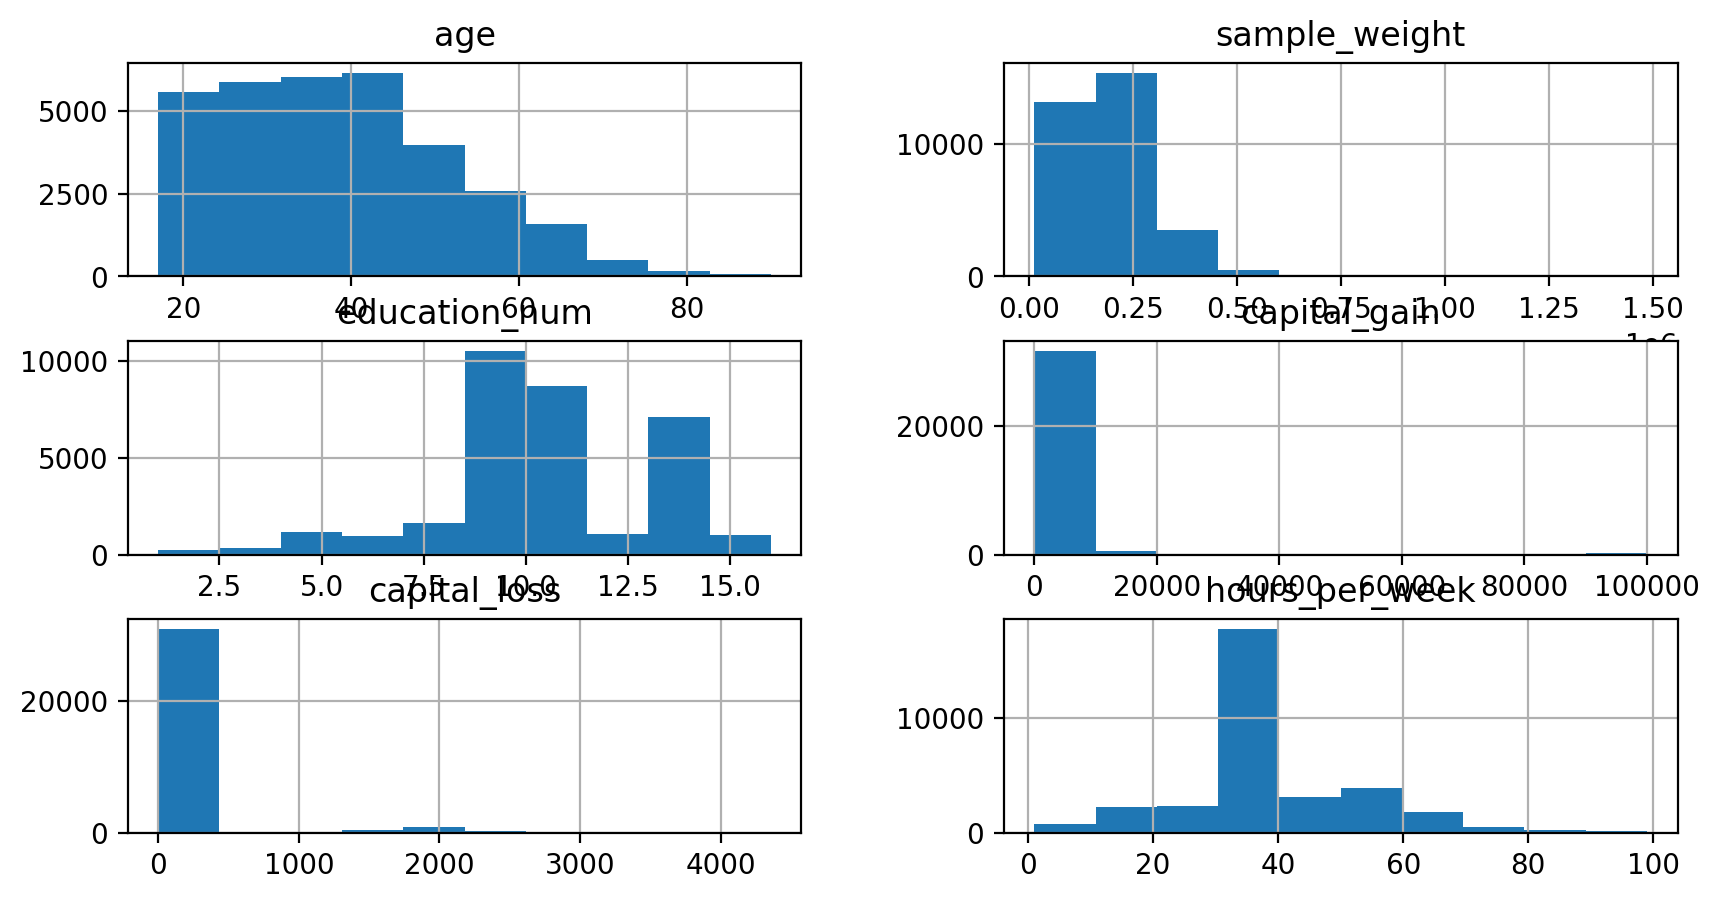

In [123]:
df.hist()
plt.show()
plt.tight_layout()

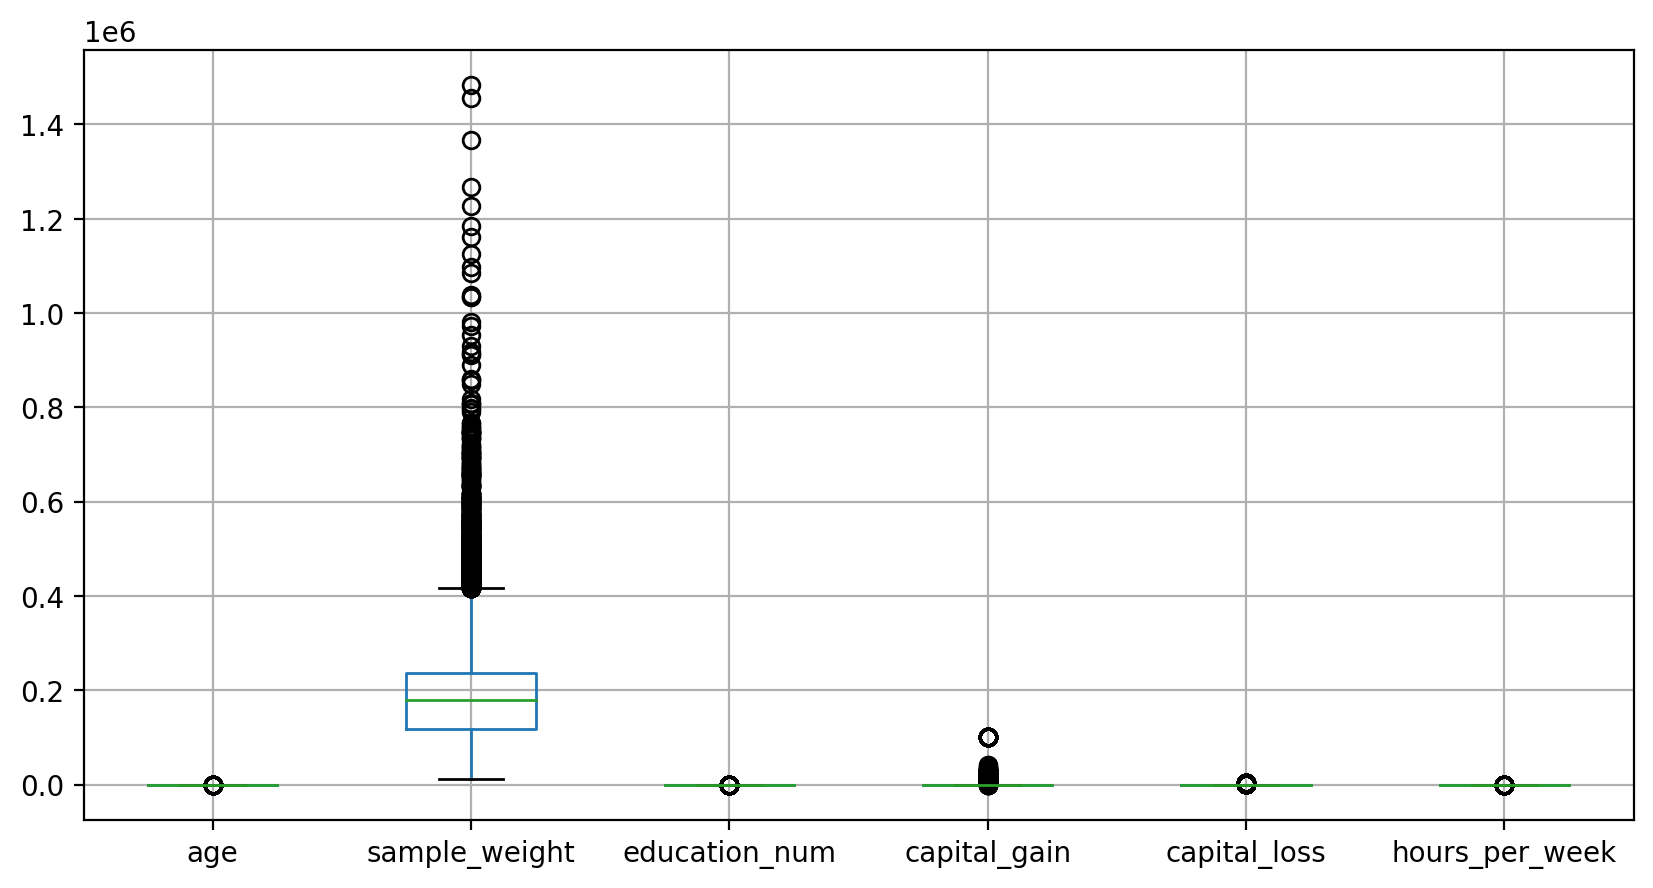

In [124]:
df.boxplot()
plt.show()

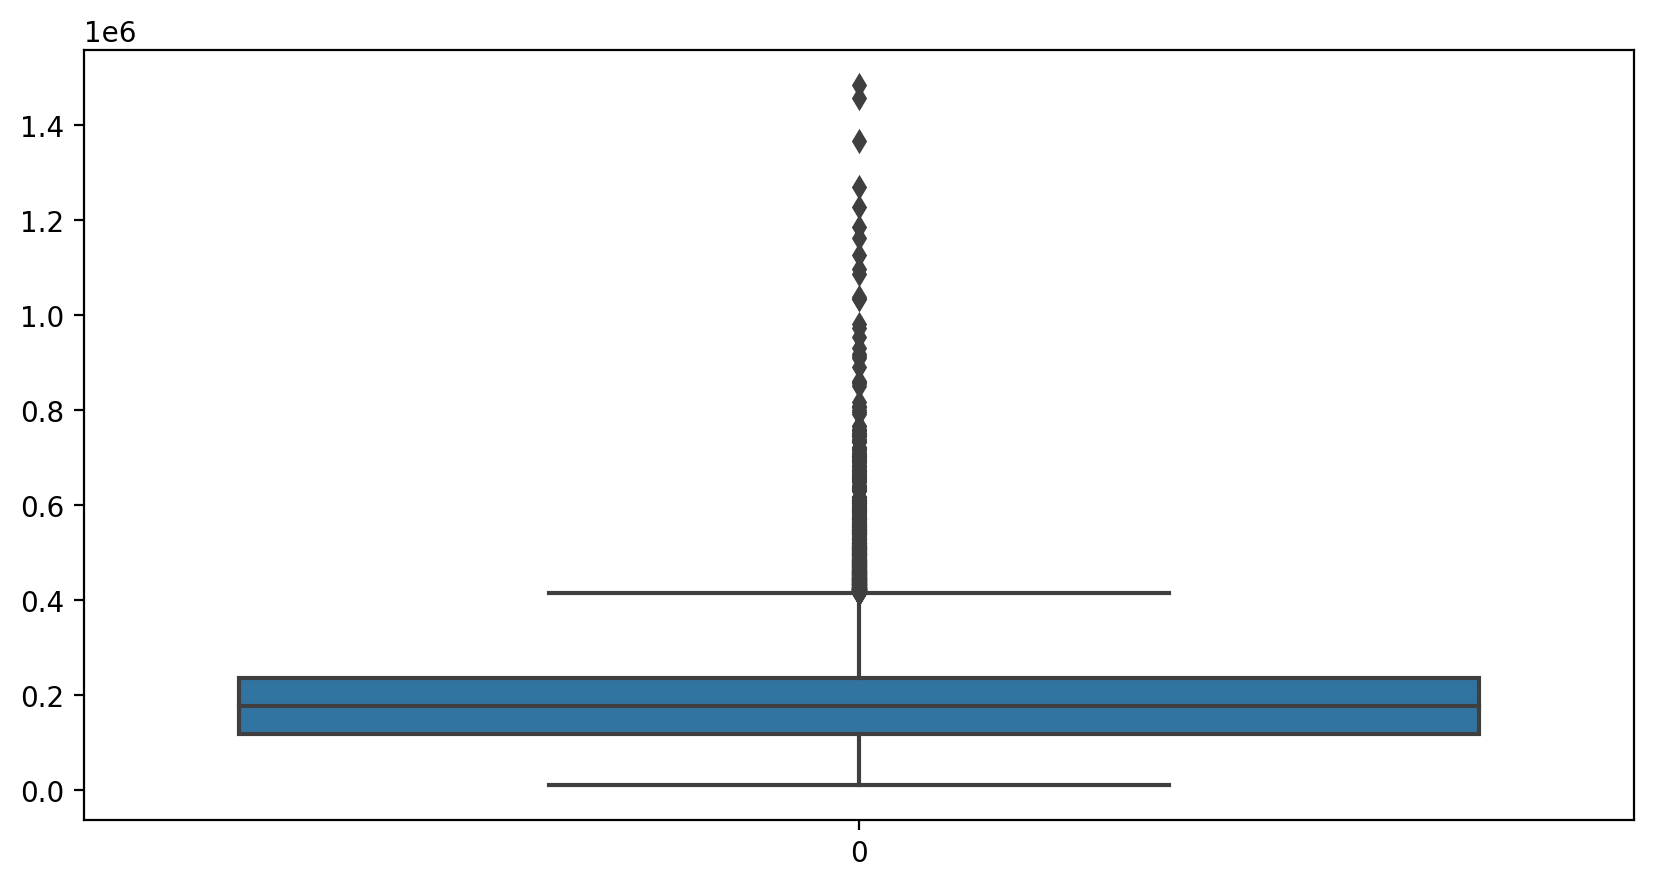

In [125]:
sns.boxplot(df['sample_weight'])
plt.show()

In [126]:
print(df['sample_weight'].min())
print(df['sample_weight'].max())
print(df['sample_weight'].quantile(0.75))

12285
1484705
237051.0


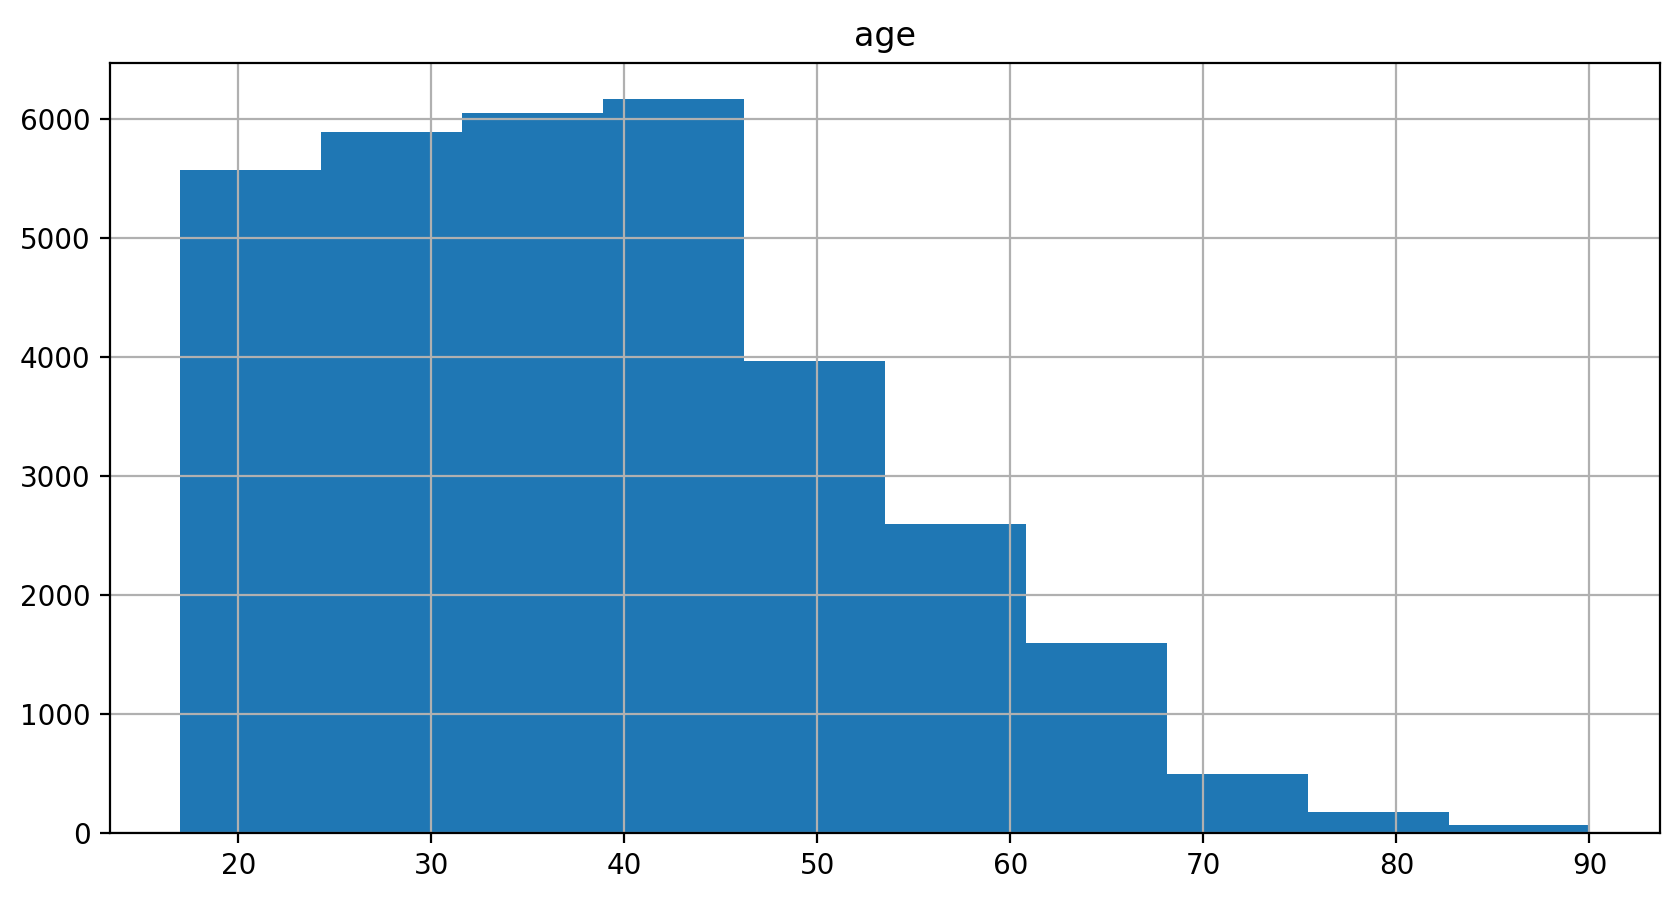

In [127]:
df.hist('age')
plt.show()

# Scaling 

In [128]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [129]:
standard_cols = ['age', 'education_num', 'hours_per_week']
minmax_cols = ['capital_gain', 'capital_loss', 'sample_weight']

In [130]:
# Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

In [131]:
# Apply scaling
df[standard_cols] = standard_scaler.fit_transform(df[standard_cols])
df[minmax_cols] = minmax_scaler.fit_transform(df[minmax_cols])

In [132]:
print(df[standard_cols + minmax_cols].head())

        age  education_num  hours_per_week  capital_gain  capital_loss  \
0  0.030671       1.134739       -0.035429       0.02174           0.0   
1  0.837109       1.134739       -2.222153       0.00000           0.0   
2 -0.042642      -0.420060       -0.035429       0.00000           0.0   
3  1.057047      -1.197459       -0.035429       0.00000           0.0   
4 -0.775768       1.134739       -0.035429       0.00000           0.0   

   sample_weight  
0       0.044302  
1       0.048238  
2       0.138113  
3       0.151068  
4       0.221488  


In [133]:
df

,age,workclass,sample_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.030671,State-gov,0.044302,Bachelors,1.134739,Never-married,Adm-clerical,Not-in-family,White,Male,0.021740,0.0,-0.035429,United-States,<=50K
1,0.837109,Self-emp-not-inc,0.048238,Bachelors,1.134739,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,-2.222153,United-States,<=50K
2,-0.042642,Private,0.138113,HS-grad,-0.420060,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,-0.035429,United-States,<=50K
3,1.057047,Private,0.151068,11th,-1.197459,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,-0.035429,United-States,<=50K
4,-0.775768,Private,0.221488,Bachelors,1.134739,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,-0.035429,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,Private,0.166404,Assoc-acdm,0.746039,Married-civ-spouse,Tech-support,Wife,White,Female,0.000000,0.0,-0.197409,United-States,<=50K
32557,0.103983,Private,0.096500,HS-grad,-0.420060,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.000000,0.0,-0.035429,United-States,>50K
32558,1.423610,Private,0.094827,HS-grad,-0.420060,Widowed,Adm-clerical,Unmarried,White,Female,0.000000,0.0,-0.035429,United-States,<=50K
32559,-1.215643,Private,0.128499,HS-grad,-0.420060,Never-married,Adm-clerical,Own-child,White,Male,0.000000,0.0,-1.655225,United-States,<=50K


### Discussion of scaling methods(standard scaler, MinMax scaler)
Both Standard Scaling and Min-Max Scaling play crucial roles in preparing numerical features for machine learning models. Standard Scaling is preferred when dealing with algorithms that assume normally distributed data or involve distance calculations, especially in the presence of outliers. On the other hand, Min-Max Scaling is ideal for algorithms that require input features in a bounded range and perform better on normalized data. The choice of scaling method should always be aligned with the specific characteristics of the dataset and the machine learning algorithm being used.

# Encoding Techniques 

In [134]:
print(df['workclass'].nunique())
print(df['education'].nunique())
print(df['marital_status'].nunique())
print(df['occupation'].nunique())
print(df['relationship'].nunique())
print(df['race'].nunique())
print(df['sex'].nunique())
print(df['native_country'].nunique())

9
16
7
15
6
5
2
42


In [135]:
from sklearn.preprocessing import LabelEncoder

In [136]:
# Identify categorical columns
cat_cols = df.select_dtypes(include='object').columns.tolist()

In [137]:
cat_cols

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [138]:
# Dropping target column if present in categorical list
cat_cols.remove('income')  # assuming this is your target variable

In [139]:
#columns with less then 5 categories and columns with more then 5 categories and 
less_then_5 = [col for col in cat_cols if df[col].nunique() < 5]
more_then_5 = [col for col in cat_cols if df[col].nunique() >= 5]

In [140]:
less_then_5

['sex']

# OneHotEncoding

In [141]:
df = pd.get_dummies(df, columns=less_then_5)

In [142]:
df.head()

,age,workclass,sample_weight,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,sex_ Female,sex_ Male
0,0.030671,State-gov,0.044302,Bachelors,1.134739,Never-married,Adm-clerical,Not-in-family,White,0.02174,0.0,-0.035429,United-States,<=50K,0,1
1,0.837109,Self-emp-not-inc,0.048238,Bachelors,1.134739,Married-civ-spouse,Exec-managerial,Husband,White,0.00000,0.0,-2.222153,United-States,<=50K,0,1
2,-0.042642,Private,0.138113,HS-grad,-0.420060,Divorced,Handlers-cleaners,Not-in-family,White,0.00000,0.0,-0.035429,United-States,<=50K,0,1
3,1.057047,Private,0.151068,11th,-1.197459,Married-civ-spouse,Handlers-cleaners,Husband,Black,0.00000,0.0,-0.035429,United-States,<=50K,0,1
4,-0.775768,Private,0.221488,Bachelors,1.134739,Married-civ-spouse,Prof-specialty,Wife,Black,0.00000,0.0,-0.035429,Cuba,<=50K,1,0


# LabelEncoder

In [144]:
le = LabelEncoder()
for col in more_then_5:
    df[col] = le.fit_transform(df[col])

In [146]:
df.head()

,age,workclass,sample_weight,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,sex_ Female,sex_ Male
0,0.030671,7,0.044302,9,1.134739,4,1,1,4,0.02174,0.0,-0.035429,39,<=50K,0,1
1,0.837109,6,0.048238,9,1.134739,2,4,0,4,0.00000,0.0,-2.222153,39,<=50K,0,1
2,-0.042642,4,0.138113,11,-0.420060,0,6,1,4,0.00000,0.0,-0.035429,39,<=50K,0,1
3,1.057047,4,0.151068,1,-1.197459,2,6,0,2,0.00000,0.0,-0.035429,39,<=50K,0,1
4,-0.775768,4,0.221488,9,1.134739,2,10,5,2,0.00000,0.0,-0.035429,5,<=50K,1,0


### Pros and Cons of One-Hot encoding and Label Encoder 
In summary, One-Hot Encoding and Label Encoding are essential techniques for handling categorical variables, each with its strengths and trade-offs. One-Hot Encoding is ideal for nominal data and models that can't interpret integer values as categories, though it may lead to high dimensionality. 
In contrast, Label Encoding is more compact and suitable for ordinal data or tree-based models that can handle categorical splits. The choice of encoding strategy should be guided by the nature of the data and the model being used to ensure accurate and efficient learning.

# Feature Engineering 

This feature helps capture whether a person gains or loses capital overall:

In [149]:
df['is_capitalist'] = (df['capital_gain'] > df['capital_loss']).astype(int)

This reflects how much time a person works relative to their education level:

In [150]:
# Avoiding division by zero
df['hours_per_education'] = df['hours_per_week'] / df['education_num'].replace(0, 1)

In [151]:
#new features
print(df[['is_capitalist', 'hours_per_education']].head())

   is_capitalist  hours_per_education
0              1            -0.031223
1              0            -1.958295
2              0             0.084344
3              0             0.029587
4              0            -0.031223


In [152]:
df.head()

,age,workclass,sample_weight,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,sex_ Female,sex_ Male,is_capitalist,hours_per_education
0,0.030671,7,0.044302,9,1.134739,4,1,1,4,0.02174,0.0,-0.035429,39,<=50K,0,1,1,-0.031223
1,0.837109,6,0.048238,9,1.134739,2,4,0,4,0.00000,0.0,-2.222153,39,<=50K,0,1,0,-1.958295
2,-0.042642,4,0.138113,11,-0.420060,0,6,1,4,0.00000,0.0,-0.035429,39,<=50K,0,1,0,0.084344
3,1.057047,4,0.151068,1,-1.197459,2,6,0,2,0.00000,0.0,-0.035429,39,<=50K,0,1,0,0.029587
4,-0.775768,4,0.221488,9,1.134739,2,10,5,2,0.00000,0.0,-0.035429,5,<=50K,1,0,0,-0.031223


# Transformation

In [155]:
# List of numerical columns
numerical_cols = ['age', 'sample_weight', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

In [156]:
# Checking skewness
skew_values = df[numerical_cols].skew().sort_values(ascending=False)
print(skew_values)

capital_gain      11.953848
capital_loss       4.594629
sample_weight      1.446980
age                0.558743
hours_per_week     0.227643
education_num     -0.311676
dtype: float64


### capital_gain are highly right-skewed with many zero values

In [158]:
import numpy as np

In [161]:
df['capital_gain'] = np.log1p(df['capital_gain'])

In [162]:
df['capital_gain'].skew()

10.671437107617788

# Isolation Forest

In [168]:
from sklearn.ensemble import IsolationForest

In [169]:
#numerical features
numerical_cols = ['age', 'sample_weight', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

In [170]:
#Apply Isolation Forest
iso = IsolationForest(contamination=0.01, random_state=42)
outlier = iso.fit_predict(df[numerical_cols])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [171]:
#Create outlier flag (1 = inlier, -1 = outlier)
df['outlier'] = outlier

In [172]:
df

,age,workclass,sample_weight,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,sex_ Female,sex_ Male,is_capitalist,hours_per_education,outlier
0,0.030671,7,0.044302,9,1.134739,4,1,1,4,0.021507,0.0,-0.035429,39,<=50K,0,1,1,-0.031223,1
1,0.837109,6,0.048238,9,1.134739,2,4,0,4,0.000000,0.0,-2.222153,39,<=50K,0,1,0,-1.958295,1
2,-0.042642,4,0.138113,11,-0.420060,0,6,1,4,0.000000,0.0,-0.035429,39,<=50K,0,1,0,0.084344,1
3,1.057047,4,0.151068,1,-1.197459,2,6,0,2,0.000000,0.0,-0.035429,39,<=50K,0,1,0,0.029587,1
4,-0.775768,4,0.221488,9,1.134739,2,10,5,2,0.000000,0.0,-0.035429,5,<=50K,1,0,0,-0.031223,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,4,0.166404,7,0.746039,2,13,5,4,0.000000,0.0,-0.197409,39,<=50K,1,0,0,-0.264609,1
32557,0.103983,4,0.096500,11,-0.420060,2,7,0,4,0.000000,0.0,-0.035429,39,>50K,0,1,0,0.084344,1
32558,1.423610,4,0.094827,11,-0.420060,6,1,4,4,0.000000,0.0,-0.035429,39,<=50K,1,0,0,0.084344,1
32559,-1.215643,4,0.128499,11,-0.420060,4,1,3,4,0.000000,0.0,-1.655225,39,<=50K,0,1,0,3.940452,1


In [173]:
df[df['outlier'] == -1]

,age,workclass,sample_weight,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,sex_ Female,sex_ Male,is_capitalist,hours_per_education,outlier
106,-1.582206,0,0.198712,0,-1.586158,4,0,3,4,0.293381,0.000000,-0.683348,39,<=50K,1,0,1,0.430819,-1
157,2.376673,6,0.327310,15,-0.031360,5,12,4,2,0.000000,0.416896,-3.113041,39,<=50K,0,1,0,99.267789,-1
222,3.769612,4,0.026799,11,-0.420060,4,8,1,2,0.000000,0.506428,-0.035429,39,<=50K,0,1,0,0.084344,-1
387,0.397233,4,0.101699,15,-0.031360,2,1,5,4,0.000000,0.554408,-2.789081,39,>50K,1,0,0,88.937470,-1
405,0.177296,4,0.294140,12,1.523438,2,4,0,4,0.000000,0.453857,1.989315,39,>50K,0,1,0,1.305806,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32035,0.103983,4,0.376422,13,-3.529656,2,8,0,4,0.000000,0.383838,-0.035429,26,<=50K,0,1,0,0.010038,-1
32090,2.010110,4,0.070098,9,1.134739,2,4,0,4,0.693147,0.000000,1.179417,0,>50K,0,1,1,1.039373,-1
32238,0.617171,4,0.191948,14,1.912138,2,4,0,4,0.693147,0.000000,-0.035429,39,>50K,0,1,1,-0.018529,-1
32341,2.596611,6,0.126901,9,1.134739,6,3,1,4,0.146963,0.000000,-2.627102,11,>50K,0,1,1,-2.315160,-1


In [174]:
#dropping outliers
df2 = df[df['outlier'] == 1].drop(columns='outlier')

In [175]:
#shape before and after
print(f"Original shape: {df.shape}")
print(f"After removing outliers: {df2.shape}")

Original shape: (32561, 19)
After removing outliers: (32235, 18)


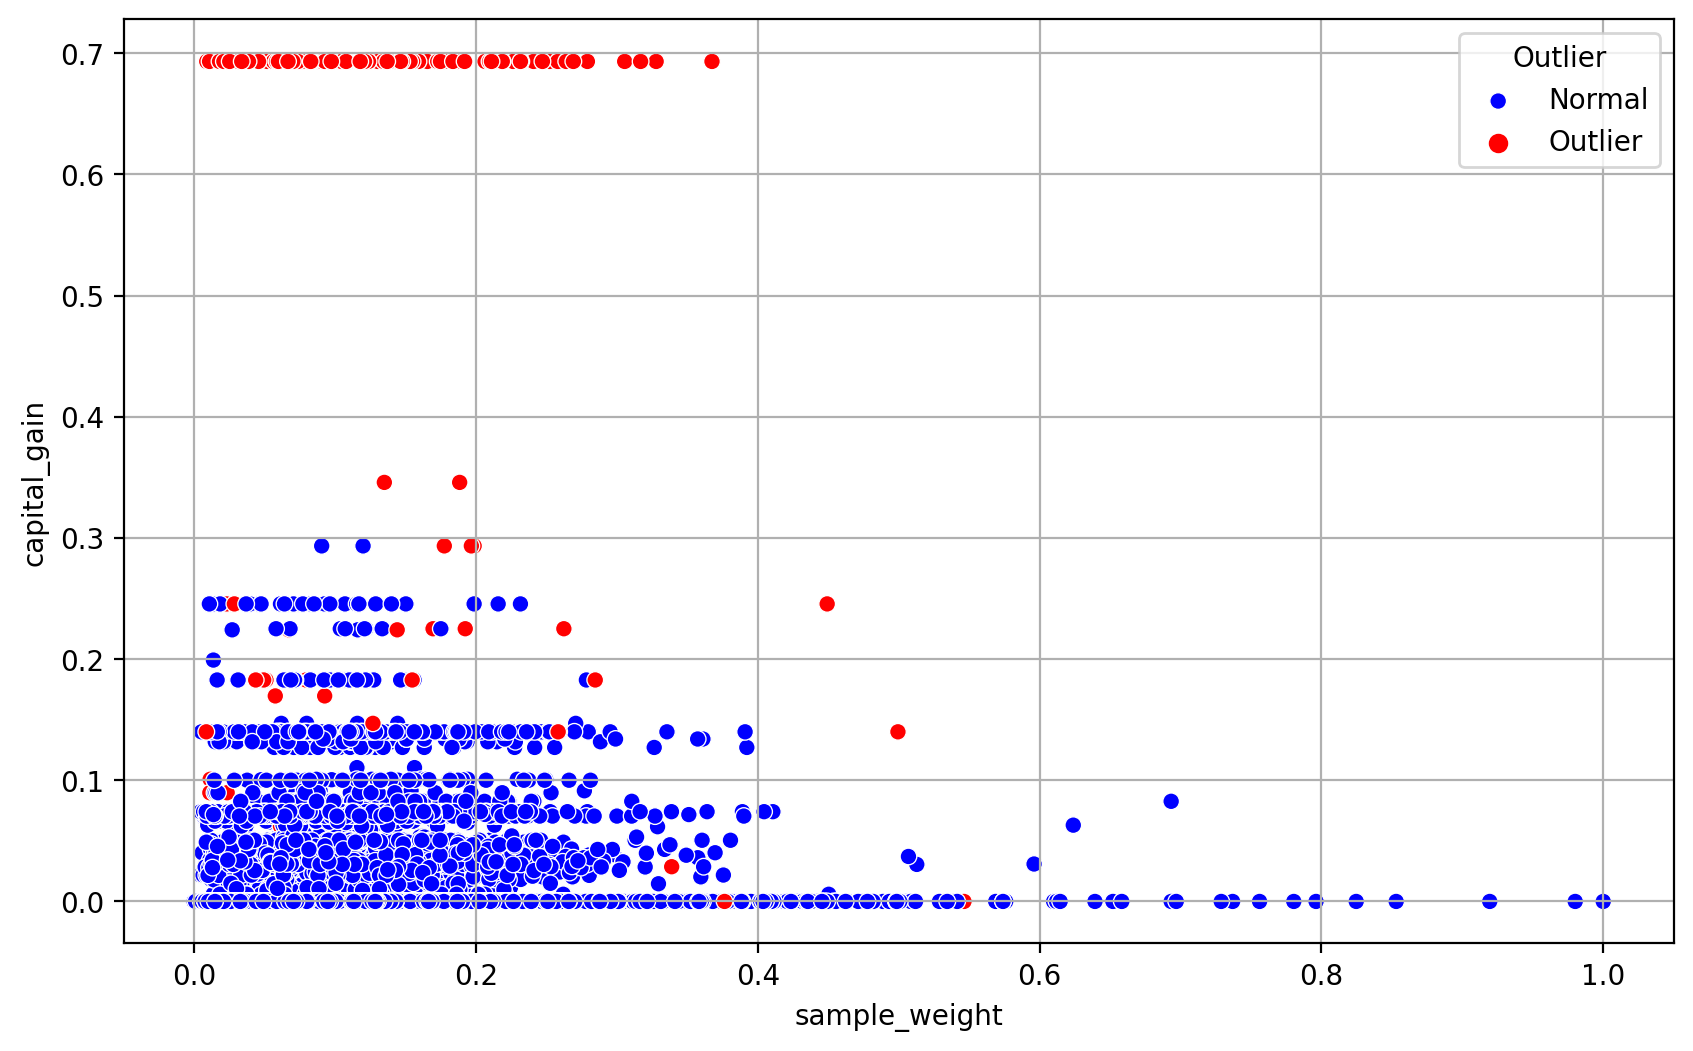

In [189]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='sample_weight',
    y='capital_gain',
    hue='outlier',
    palette={1: 'blue', -1: 'red'}
)
plt.legend(title='Outlier', labels=['Normal', 'Outlier'])
plt.grid(True)
plt.show()

### How outliers can affect model performance.
Outliers can significantly eefect the performance of machine learning models by introducing noise, distorting statistical measures, and misleading pattern recognition. Their presence can lead to poor accuracy, overfitting, and unreliable model interpretation. Therefore, detecting and handling outliers—whether through visualization, statistical methods, or algorithms like Isolation Forest—is a critical step in the data preprocessing pipeline to ensure robust and reliable model performance.

# PPS 

In [190]:
#!pip install ppscore

Defaulting to user installation because normal site-packages is not writeable

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
transformers 2.1.1 requires sentencepiece, which is not installed.
pandas-profiling 3.1.0 requires joblib~=1.0.1, but you have joblib 1.5.0 which is incompatible.



                                              0.0/307.7 kB ? eta -:--:--
     --                                    20.5/307.7 kB 640.0 kB/s eta 0:00:01
     ---                                   30.7/307.7 kB 325.1 kB/s eta 0:00:01
     ------                                51.2/307.7 kB 327.7 kB/s eta 0:00:01
     -------                               61.4/307.7 kB 363.1 kB/s eta 0:00:01
     -------                               61.4/307.7 kB 363.1 kB/s eta 0:00:01
     -------                               61.4/307.7 kB 363.1 kB/s eta 0:00:01
     -------                               61.4/307.7 kB 363.1 kB/s eta 0:00:01
     --------------                       122.9/307.7 kB 288.1 kB/s eta 0:00:01
     ----------------                     143.4/307.7 kB 315.4 kB/s eta 0:00:01
     -----------------                    153.6/307.7 kB 305.7 kB/s eta 0:00:01
     --------------------                 174.1/307.7 kB 317.5 kB/s eta 0:00:01
     ---------------------                184.

In [191]:
import ppscore as pps

In [192]:
df2.head()

,age,workclass,sample_weight,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,sex_ Female,sex_ Male,is_capitalist,hours_per_education
0,0.030671,7,0.044302,9,1.134739,4,1,1,4,0.021507,0.0,-0.035429,39,<=50K,0,1,1,-0.031223
1,0.837109,6,0.048238,9,1.134739,2,4,0,4,0.000000,0.0,-2.222153,39,<=50K,0,1,0,-1.958295
2,-0.042642,4,0.138113,11,-0.420060,0,6,1,4,0.000000,0.0,-0.035429,39,<=50K,0,1,0,0.084344
3,1.057047,4,0.151068,1,-1.197459,2,6,0,2,0.000000,0.0,-0.035429,39,<=50K,0,1,0,0.029587
4,-0.775768,4,0.221488,9,1.134739,2,10,5,2,0.000000,0.0,-0.035429,5,<=50K,1,0,0,-0.031223


In [193]:
pps.score(df2, x='capital_gain',y = 'income')

{'x': 'capital_gain',
 'y': 'income',
 'ppscore': 0.27504285544630125,
 'case': 'classification',
 'is_valid_score': True,
 'metric': 'weighted F1',
 'baseline_score': 0.6604299489506524,
 'model_score': 0.7538262654153113,
 'model': DecisionTreeClassifier()}

In [194]:
pps.score(df2, x='workclass',y = 'income')

{'x': 'workclass',
 'y': 'income',
 'ppscore': 0.00567778878656914,
 'case': 'classification',
 'is_valid_score': True,
 'metric': 'weighted F1',
 'baseline_score': 0.6604299489506524,
 'model_score': 0.6623579559787551,
 'model': DecisionTreeClassifier()}

In [203]:
#PPS Matrix
pps = pps.matrix(df2)[['x', 'y', 'ppscore']]
pps_pivot = pps.pivot_table(index='x', columns='y', values='ppscore')

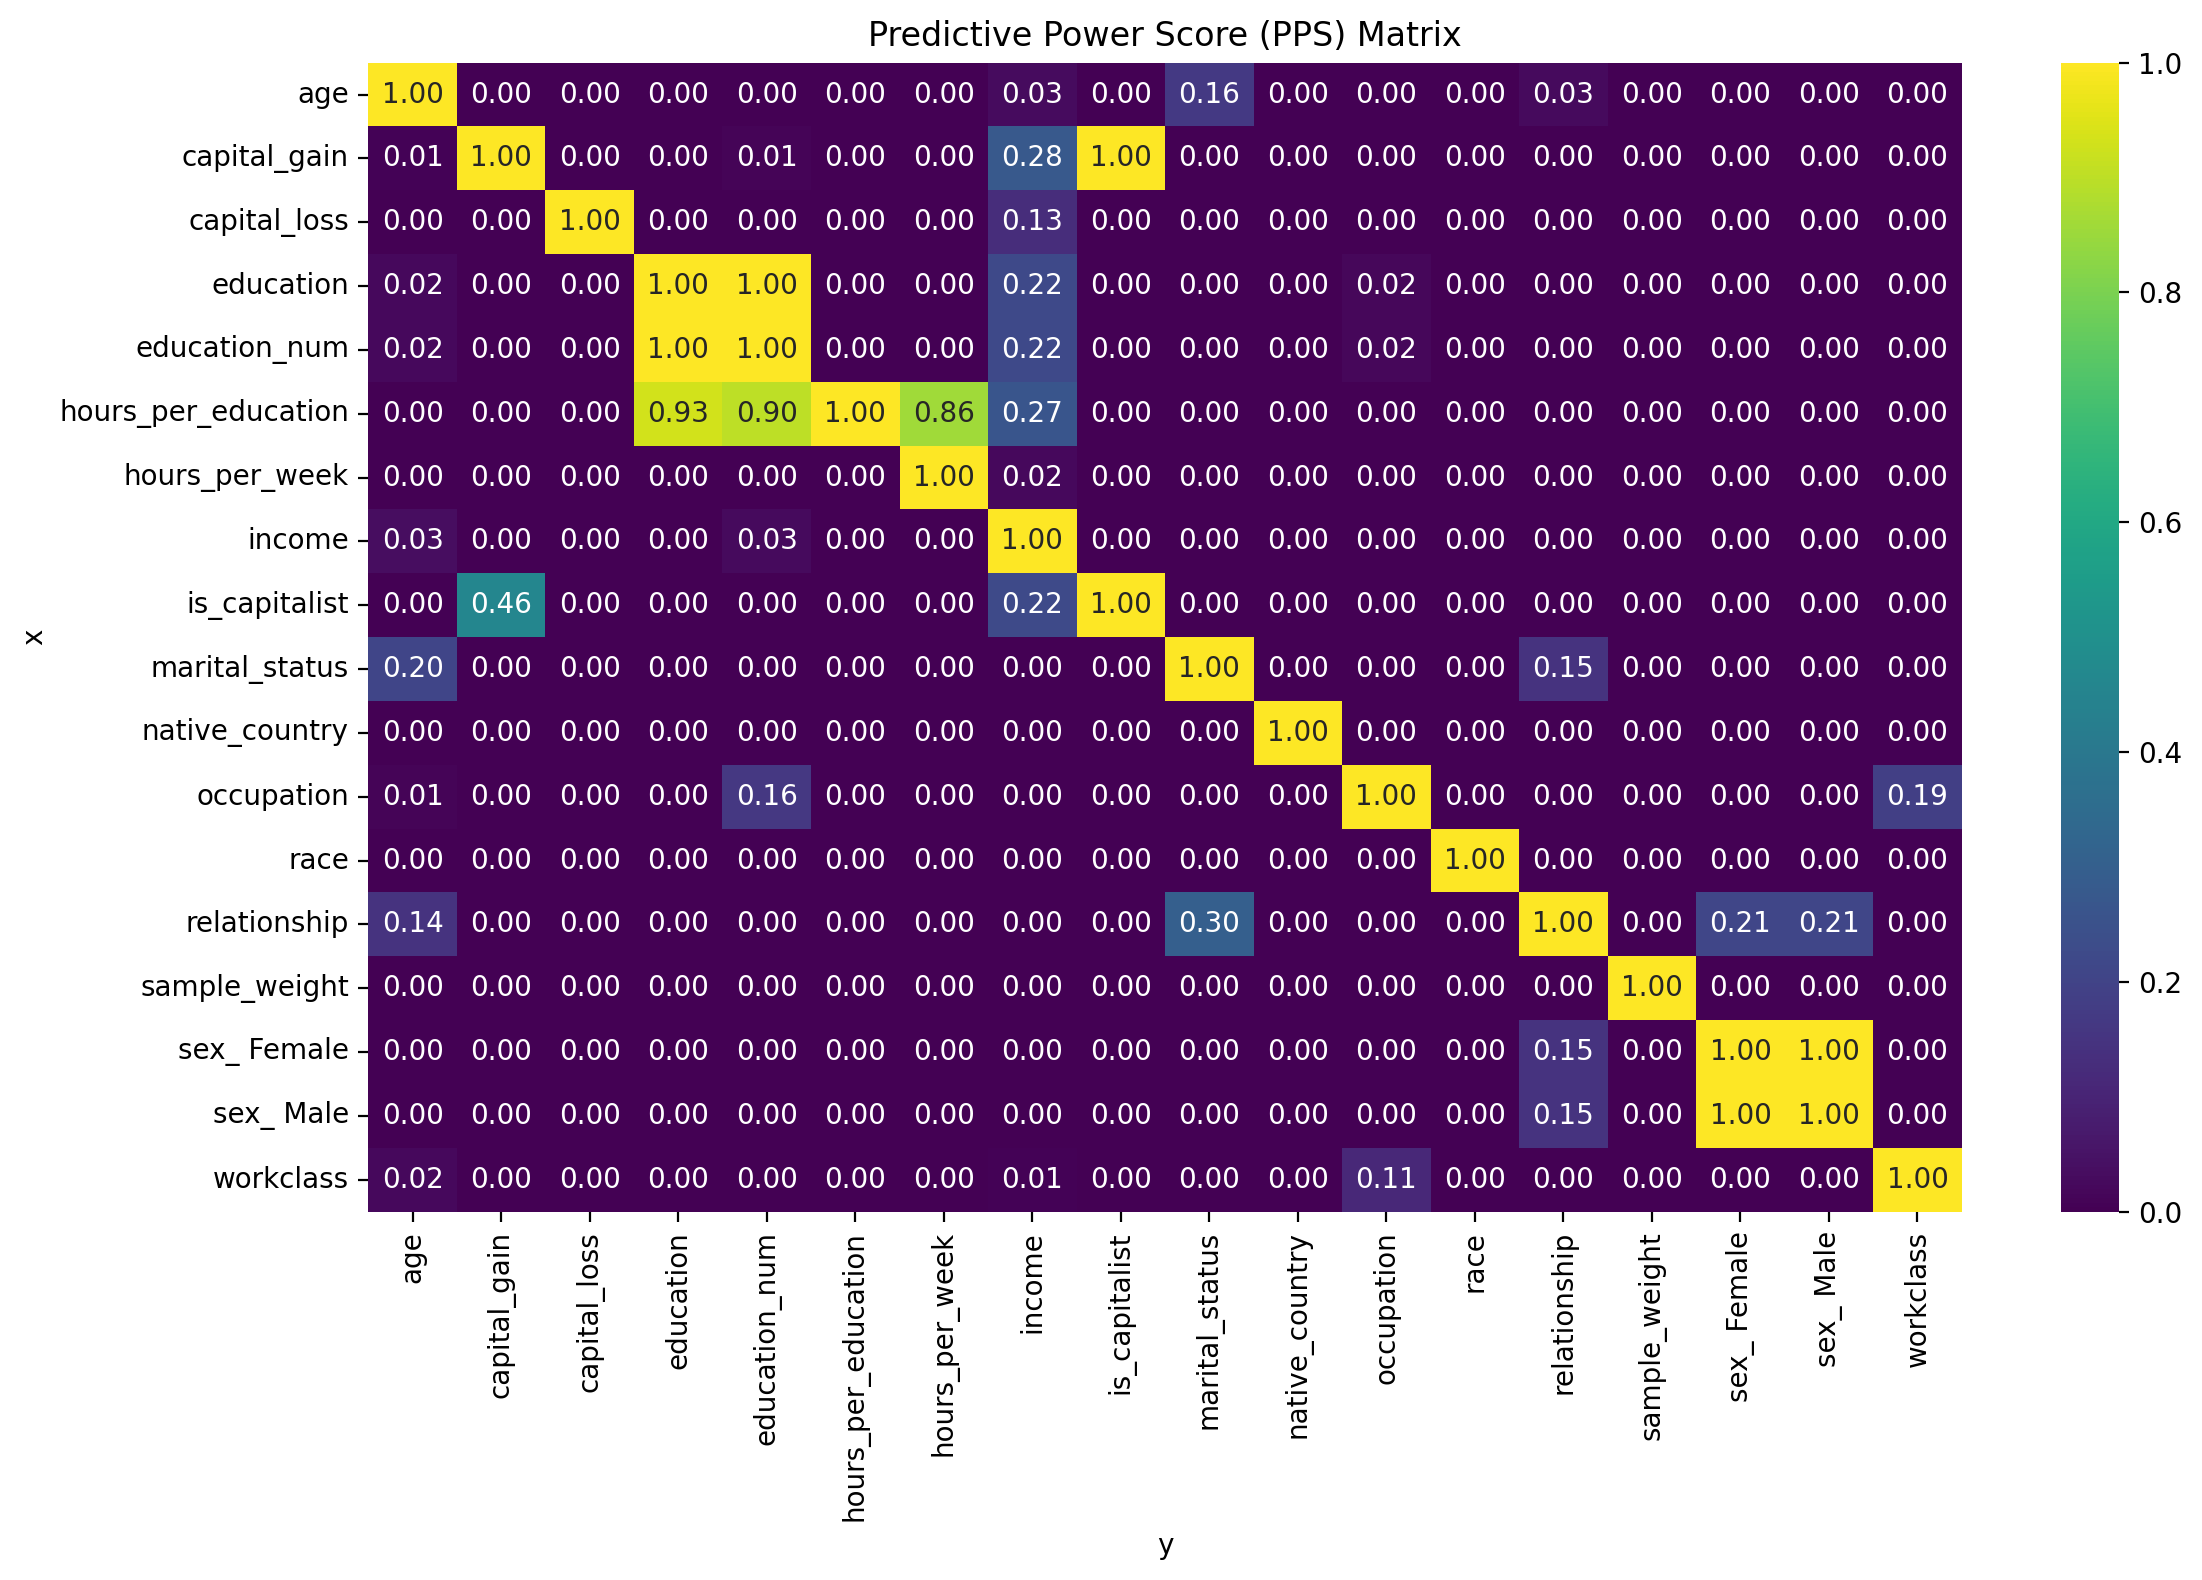

In [204]:
plt.figure(figsize=(12, 8))
sns.heatmap(pps_pivot, cmap='viridis', annot=True, fmt=".2f")
plt.title("Predictive Power Score (PPS) Matrix")
plt.tight_layout()
plt.show()

In [208]:
#Correlation Matrix (only numeric features)
numeric_df2 = df2.select_dtypes(include=['int64', 'float64'])
corr = numeric_df2.corr()

<Figure size 2000x1600 with 0 Axes>

<Figure size 2000x1600 with 0 Axes>

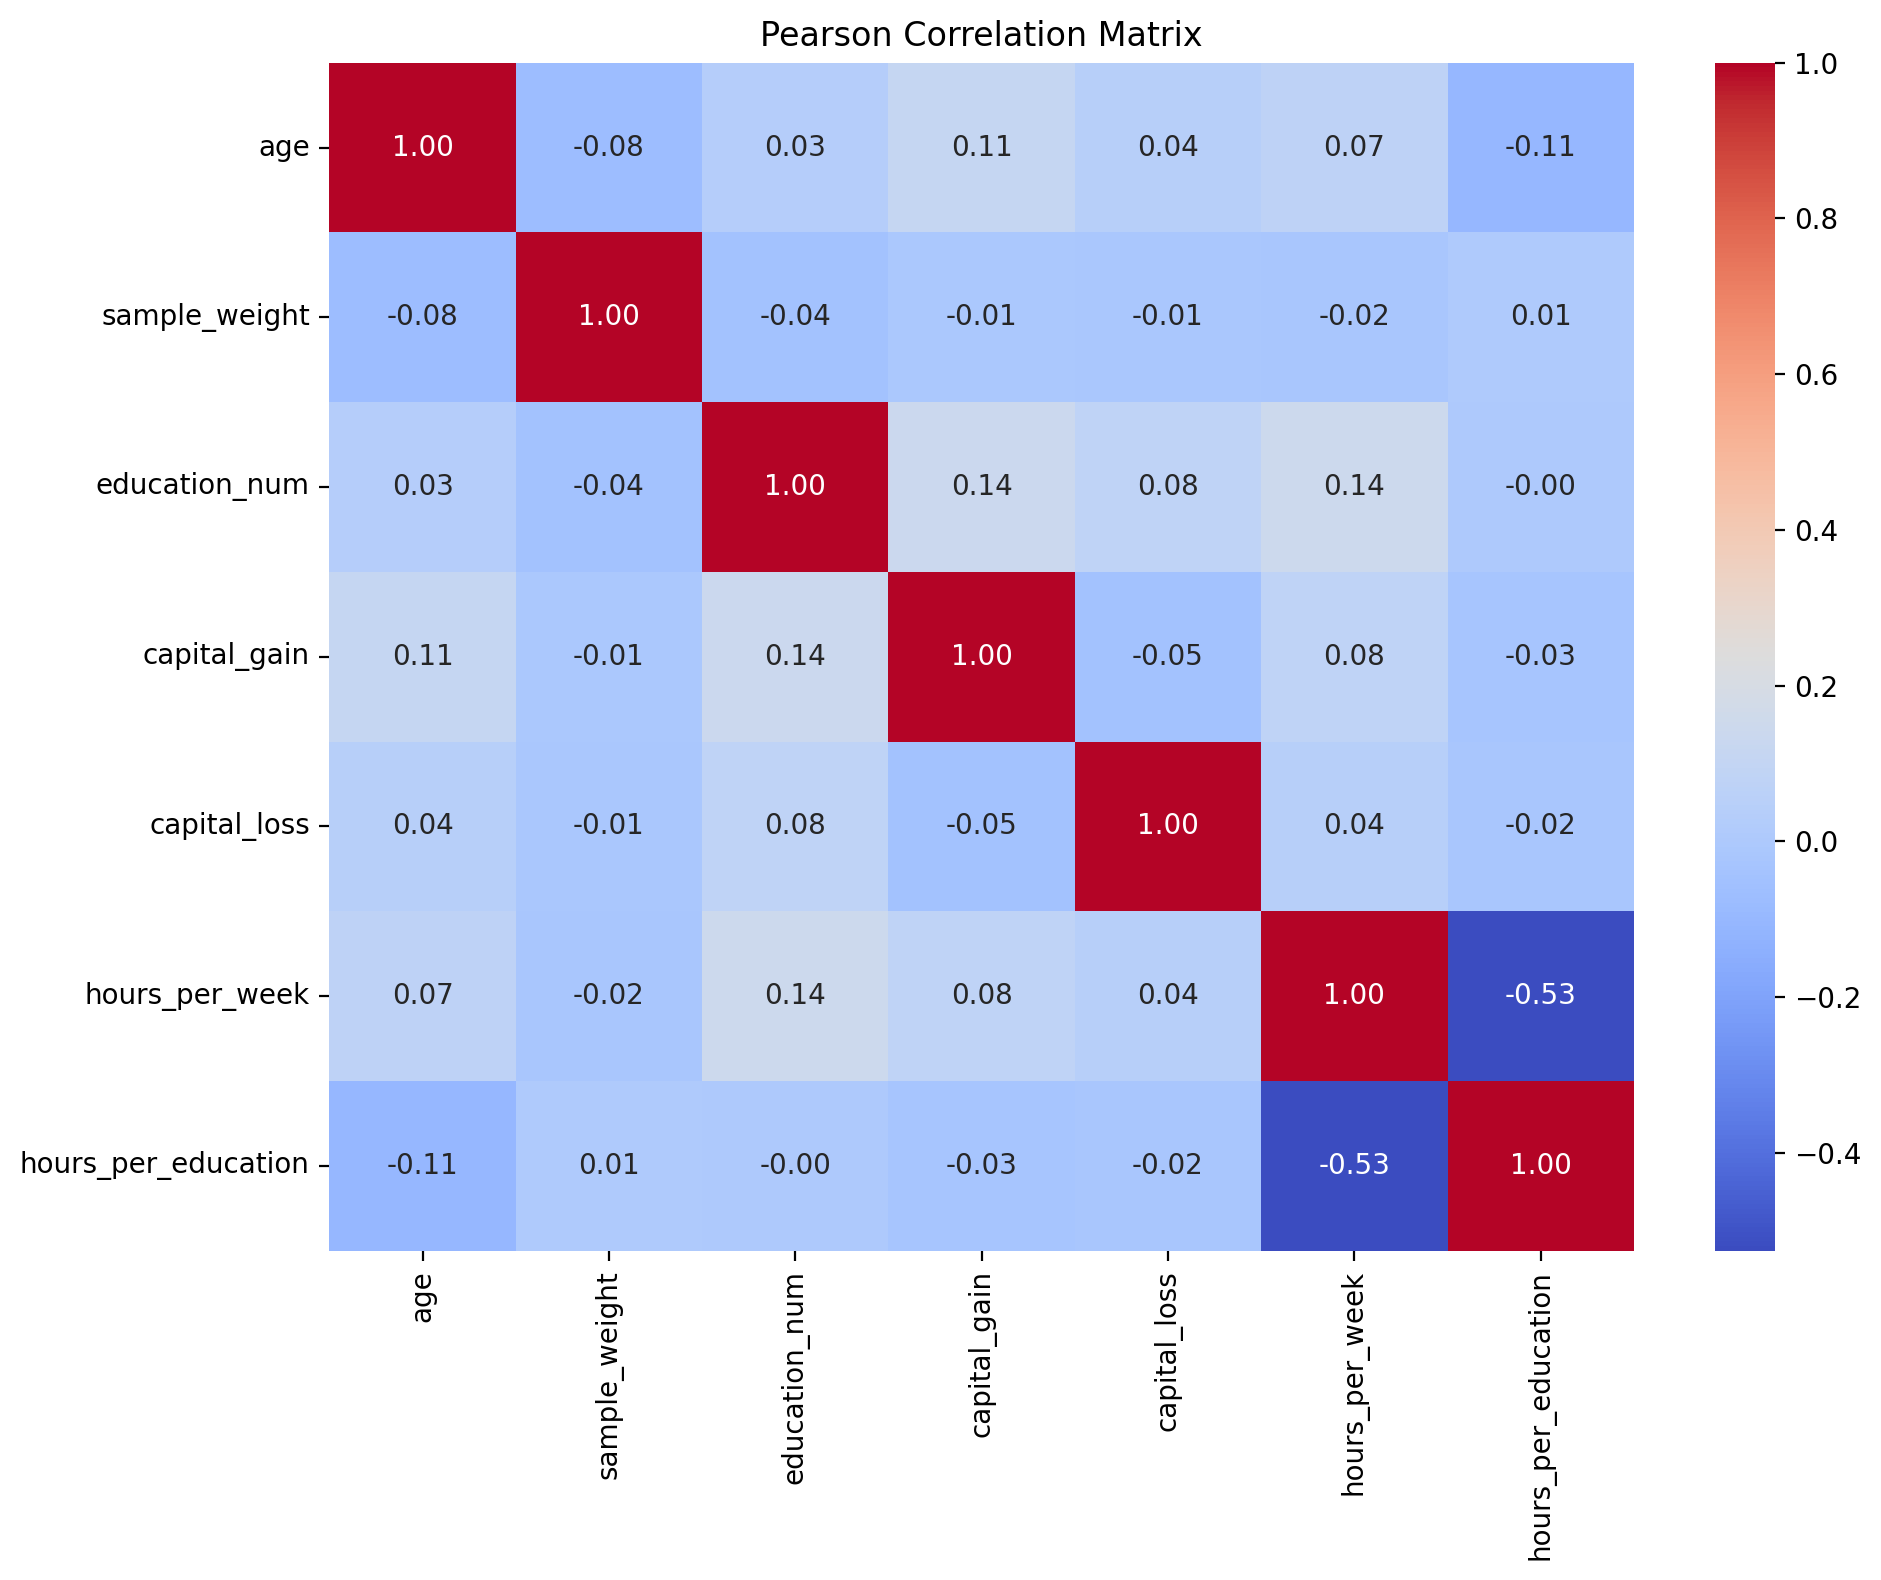

In [209]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pearson Correlation Matrix")
plt.tight_layout()
plt.show()

### PPS vs Correlation matrix
While the correlation matrix is a traditional and useful tool for identifying linear relationships between numerical features, it falls short in capturing complex, non-linear, or asymmetric dependencies. The Predictive Power Score (PPS), on the other hand, offers a more flexible and informative perspective by measuring how well one feature can predict another, regardless of data type or relationship form. Thus, PPS serves as a valuable complement to correlation, especially during feature selection and model-building phases in data science workflows.